In [1]:
from vega_datasets import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exercises
---
## Part I

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
1. Write the code necessary to visualize the minimum temperature over time.
1. Write the code necessary to visualize the maximum temperature over time.
1. Which month is the coldest, on average?
1. Which month has the highest average temperature?
1. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
1. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [2]:
df = data.sf_temps()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df = df.set_index('date').sort_index()

Text(0, 0.5, 'Temp (degrees)')

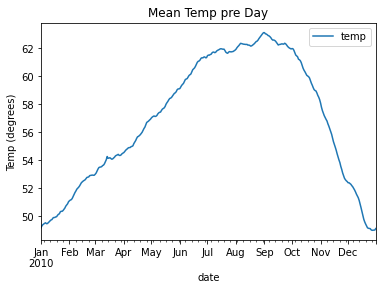

In [5]:
df.resample('1d').mean().plot()
plt.title('Mean Temp pre Day')
plt.ylabel('Temp (degrees)')

Text(0, 0.5, 'Temp (degrees)')

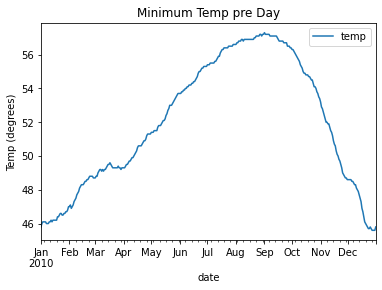

In [6]:
df.resample('1d').min().plot()
plt.title('Minimum Temp pre Day')
plt.ylabel('Temp (degrees)')

Text(0, 0.5, 'Temp (degrees)')

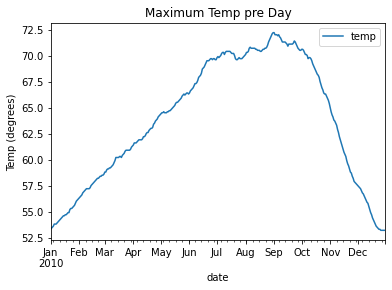

In [7]:
df.resample('1d').max().plot()
plt.title('Maximum Temp pre Day')
plt.ylabel('Temp (degrees)')

In [8]:
# Coldest month = January
df.resample('M').mean().sort_values('temp')[:1]

,temp
date,
2010-01-31,49.98414


In [9]:
# Hottest month = January
df.resample('M').mean().sort_values('temp', ascending=False)[:1]

,temp
date,
2010-09-30,62.487083


In [10]:
daily_temp_diff = df.resample('1d').agg(['max', 'min']).temp['max'] - df.resample('1d').agg(['max', 'min']).temp['min']
daily_temp_diff

date
2010-01-01    7.5
2010-01-02    7.4
2010-01-03    7.4
2010-01-04    7.5
2010-01-05    7.7
             ... 
2010-12-27    7.6
2010-12-28    7.6
2010-12-29    7.6
2010-12-30    7.6
2010-12-31    7.4
Freq: D, Length: 365, dtype: float64

In [27]:
daily_temp_diff.resample('M').mean().sort_values(ascending=False)[:1]

date
2010-09-30    14.403333
dtype: float64

<AxesSubplot:xlabel='date'>

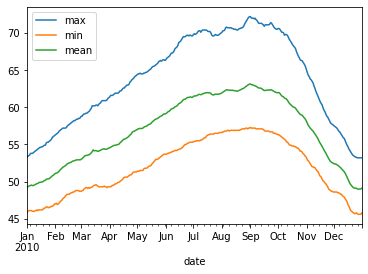

In [12]:
df.resample('1d').agg(['max', 'min', 'mean']).temp.plot()

---
## Part II


1. Which year and month combination has the highest amount of precipitation?
1. Visualize the amount of monthly precipitation over time.
1. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
1. Which year-month combination is the windiest?
1. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)
1. In which month does it rain the most?
1. Which month has the most number of days with a non-zero amount of precipitation?

In [13]:
df = data.seattle_weather()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [14]:
df = df.set_index('date').sort_index()
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [15]:
# March 2015 has highest precipitation amount
df.resample('M').precipitation.max().sort_values()[-1:]

date
2015-03-31    55.9
Name: precipitation, dtype: float64

Text(0, 0.5, 'Precipitation (in.)')

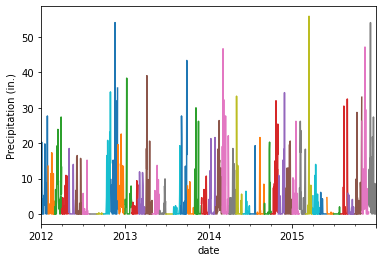

In [16]:
df.resample('M').precipitation.plot()
plt.ylabel('Precipitation (in.)')

Text(0, 0.5, 'Speed (mph)')

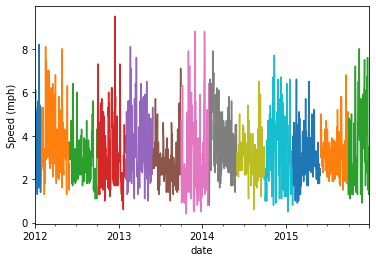

In [17]:
df.resample('4M').wind.plot()
plt.ylabel('Speed (mph)')

In [18]:
# December 2012 is the windiest
df.resample('M').wind.max().sort_values()[-1:]

date
2012-12-31    9.5
Name: wind, dtype: float64

In [19]:
# July 2013 was the sunniest month
df[df.weather == 'sun'].weather.resample('m').count().sort_values()[-1:]

date
2013-07-31    27
Name: weather, dtype: int64

In [20]:
# November 2012 was the rainiest month
df[df.weather == 'rain'].weather.resample('m').count().sort_values()[-1:]

date
2012-11-30    25
Name: weather, dtype: int64

In [21]:
# December 2012 was the month with the most days of rain
df[df.precipitation > 0].precipitation.resample('m').count().sort_values()[-1:]

date
2012-12-31    27
Name: precipitation, dtype: int64

---
## Part III

1. Convert any negative delays to 0.
1. Which hour of the day has the highest average delay?
1. Does the day of the week make a difference in the delay amount?
1. Does the month make a difference in the delay amount?

In [52]:
df = data.flights_20k()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [53]:
df = df.set_index('date').sort_index()
df.delay = np.where(df.delay < 0, 0, df.delay)
df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


In [54]:
df['hour'] = df.index.hour

In [56]:
df.delay

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00     0
2001-01-01 07:00:00     0
2001-01-01 07:00:00     0
                       ..
2001-03-31 21:02:00    26
2001-03-31 21:05:00     0
2001-03-31 21:05:00     0
2001-03-31 21:30:00    30
2001-03-31 21:30:00     0
Name: delay, Length: 20000, dtype: int64

In [64]:
# The third hour of the day has the highest average delay time
df.groupby('hour').delay.mean().sort_values()[-1:]

hour
3    302.5
Name: delay, dtype: float64

In [74]:
df['day_of_week'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [78]:
# On average, Fridays have the highest delay times
df.groupby('day_of_week').delay.mean().sort_values()

day_of_week
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

In [79]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [80]:
# On average, February has the highest delay times
df.groupby('month').delay.mean().sort_values()

month
March        9.875287
January     11.301592
February    12.306106
Name: delay, dtype: float64

---
## Bonus

1. For each row, calculate the percentage of the year's total that energy source provided.
1. Lineplot of generation over time, color by source
1. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
1. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
1. Is the total generation increasing over time?
1. How would you control for increasing consumption over time when considering how much energy is coming from each source?
1. express each number as a % of the year's total

In [81]:
df = data.iowa_electricity()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [82]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [83]:
df['years_tot_per'] = df.resample('Y').transform('count')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'